<a href="https://colab.research.google.com/github/mekhlakapoor/mekhlakapoor/blob/master/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
import os, shutil
#path to the directory where the original dataset was uncompressed
original_dataset_dir = '/content/gdrive/My Drive/Intelligence & Analytics/Colab Notebooks/dogs-vs-cats/train/'

#directory where we'll store the smaller dataset
base_dir = '/content/gdrive/My Drive/Intelligence & Analytics/Colab Notebooks/_41'
os.mkdir(base_dir)

#directories for the training, validation, and test splits
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_fake_dir = os.path.join(train_dir, 'fake')
os.mkdir(train_fake_dir)
train_original_dir = os.path.join(train_dir, 'original')
os.mkdir(train_original_dir)

validation_fake_dir = os.path.join(validation_dir, 'fake')
os.mkdir(validation_fake_dir)
validation_original_dir = os.path.join(validation_dir, 'original')
os.mkdir(validation_original_dir)

test_fake_dir = os.path.join(test_dir, 'fake')
os.mkdir(test_fake_dir)
test_original_dir = os.path.join(test_dir, 'original')
os.mkdir(test_original_dir)

# cats train: fake and original 
fnames = ['cat.{}.jpg'.format(i) for i in range(0,500)]
for fname in fnames: 
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_fake_dir, fname)
  shutil.copyfile(src,dst)
fnames = ['cat.{}.jpg'.format(i) for i in range(500,1000)]
for fname in fnames: 
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_original_dir, fname)
  shutil.copyfile(src,dst)

#cats validation: fake and original
fnames = ['cat.{}.jpg'.format(i) for i in range(1000,1250)]
for fname in fnames: 
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(validation_fake_dir, fname)
  shutil.copyfile(src,dst)
fnames = ['cat.{}.jpg'.format(i) for i in range(1250,1500)]
for fname in fnames: 
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(validation_original_dir, fname)
  shutil.copyfile(src,dst)

#cats test: fake and original 
fnames = ['cat.{}.jpg'.format(i) for i in range(1000,1250)]
for fname in fnames: 
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(test_fake_dir, fname)
  shutil.copyfile(src,dst)
fnames = ['cat.{}.jpg'.format(i) for i in range(1250,1500)]
for fname in fnames: 
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(test_original_dir, fname)
  shutil.copyfile(src,dst)

#dogs train: fake and original 
fnames = ['dog.{}.jpg'.format(i) for i in range(0,500)]
for fname in fnames: 
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_fake_dir, fname)
  shutil.copyfile(src,dst)
fnames = ['dog.{}.jpg'.format(i) for i in range(500,1000)]
for fname in fnames: 
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_original_dir, fname)
  shutil.copyfile(src,dst)

#dogs validation: fake and original
fnames = ['dog.{}.jpg'.format(i) for i in range(1000,1250)]
for fname in fnames: 
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(validation_fake_dir, fname)
  shutil.copyfile(src,dst)
fnames = ['dog.{}.jpg'.format(i) for i in range(1250,1500)]
for fname in fnames: 
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(validation_original_dir, fname)
  shutil.copyfile(src,dst)

#dogs test: fake and original
fnames = ['dog.{}.jpg'.format(i) for i in range(1000,1250)]
for fname in fnames: 
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(test_fake_dir, fname)
  shutil.copyfile(src,dst)
fnames = ['dog.{}.jpg'.format(i) for i in range(1250,1500)]
for fname in fnames: 
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(test_original_dir, fname)
  shutil.copyfile(src,dst)

print('total training fake images:', len(os.listdir(train_fake_dir)))
print('total training original images:', len(os.listdir(train_original_dir)))
print('total validation fake images:', len(os.listdir(validation_fake_dir)))
print('total validation original images:', len(os.listdir(validation_original_dir)))
print('total test fake images:', len(os.listdir(test_fake_dir)))
print('total test original images:', len(os.listdir(test_original_dir)))

total training fake images: 1000
total training original images: 1000
total validation fake images: 500
total validation original images: 500
total test fake images: 500
total test original images: 500


In [ ]:
#from google.colab import drive
from PIL import Image, ImageDraw, ImageFilter

#drive.mount('/content/gdrive')
path='/content/gdrive/My Drive/Intelligence & Analytics/Colab Notebooks/_41/train/fake/'
#save_dir = '/content/gdrive/My Drive/Intelligence & Analytics/Colab Notebooks/_6/train/fake/'
#img = Image.open(path + "dog.jpeg")

for i in range(0,500): 
  img = Image.open(path + 'cat.{}.jpg'.format(i))
  pathWidth=int(0.5*i)
  patchWidth = int(0.5*i)
  patchHeight = int(0.5*i)
  patch = Image.new("L", (patchWidth, patchHeight), 0)
  draw = ImageDraw.Draw(patch)
  draw.rectangle((0,0,patchWidth,patchHeight), fill=255)
  topMargin = 20
  LeftMargin = 20
  combined = img.copy()
  combined.paste(patch, (topMargin, LeftMargin))
  combined.save(path + 'cat.{}.jpg'.format(i))

for i in range(0,500): 
  img = Image.open(path + 'dog.{}.jpg'.format(i))
  pathWidth=int(0.5*i)
  patchWidth = int(0.5*i)
  patchHeight = int(0.5*i)
  patch = Image.new("L", (patchWidth, patchHeight), 0)
  draw = ImageDraw.Draw(patch)
  draw.rectangle((0,0,patchWidth,patchHeight), fill=255)
  topMargin = 20
  LeftMargin = 20
  combined = img.copy()
  combined.paste(patch, (topMargin, LeftMargin))
  combined.save(path + 'dog{}.jpg'.format(i))

In [ ]:
#from google.colab import drive
from PIL import Image, ImageDraw, ImageFilter

#drive.mount('/content/gdrive')
path='/content/gdrive/My Drive/Intelligence & Analytics/Colab Notebooks/_41/validation/fake/'
#save_dir = '/content/gdrive/My Drive/Intelligence & Analytics/Colab Notebooks/_6/train/fake/'
#img = Image.open(path + "dog.jpeg")

for i in range(1000,1249): 
  img = Image.open(path + 'cat.{}.jpg'.format(i))
  pathWidth=int(0.5*(i-750))
  patchWidth = int(0.5*(i-750))
  patchHeight = int(0.5*(i-750))
  patch = Image.new("L", (patchWidth, patchHeight), 0)
  draw = ImageDraw.Draw(patch)
  draw.rectangle((0,0,patchWidth,patchHeight), fill=255)
  topMargin = 20
  LeftMargin = 20
  combined = img.copy()
  combined.paste(patch, (topMargin, LeftMargin))
  combined.save(path + 'cat.{}.jpg'.format(i))

for i in range(1000,1249): 
  img = Image.open(path + 'dog.{}.jpg'.format(i))
  pathWidth=int(0.5*(i-750))
  patchWidth = int(0.5*(i-750))
  patchHeight = int(0.5*(i-750))
  patch = Image.new("L", (patchWidth, patchHeight), 0)
  draw = ImageDraw.Draw(patch)
  draw.rectangle((0,0,patchWidth,patchHeight), fill=255)
  topMargin = 20
  LeftMargin = 20
  combined = img.copy()
  combined.paste(patch, (topMargin, LeftMargin))
  combined.save(path + 'dog{}.jpg'.format(i))

In [ ]:
#from google.colab import drive
from PIL import Image, ImageDraw, ImageFilter

#drive.mount('/content/gdrive')
path='/content/gdrive/My Drive/Intelligence & Analytics/Colab Notebooks/_41/test/fake/'
#save_dir = '/content/gdrive/My Drive/Intelligence & Analytics/Colab Notebooks/_6/train/fake/'
#img = Image.open(path + "dog.jpeg")

for i in range(1000,1249): 
  img = Image.open(path + 'cat.{}.jpg'.format(i))
  pathWidth=int(0.5*(i-750)) #training: 1.2*i where i 0-500 
  patchWidth = int(0.5*(i-750))
  patchHeight = int(0.5*(i-750)) #change subtraction to find best range of box size (change the 1000)
  patch = Image.new("L", (patchWidth, patchHeight), 0)
  draw = ImageDraw.Draw(patch)
  draw.rectangle((0,0,patchWidth,patchHeight), fill=255)
  topMargin = 20
  LeftMargin = 20
  combined = img.copy()
  combined.paste(patch, (topMargin, LeftMargin))
  combined.save(path + 'cat.{}.jpg'.format(i))

for i in range(1000,1249): 
  img = Image.open(path + 'dog.{}.jpg'.format(i))
  pathWidth=int(0.5*(i-750)) 
  patchWidth = int(0.5*(i-750))
  patchHeight = int(0.5*(i-750)) #make 1000 to 750 (0.1) 
  patch = Image.new("L", (patchWidth, patchHeight), 0)
  draw = ImageDraw.Draw(patch)
  draw.rectangle((0,0,patchWidth,patchHeight), fill=255)
  topMargin = 20
  LeftMargin = 20
  combined = img.copy()
  combined.paste(patch, (topMargin, LeftMargin))
  combined.save(path + 'dog{}.jpg'.format(i))

In [ ]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D (32, (3,3), activation='relu',
                         input_shape = (150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [ ]:
from keras import optimizers
model.compile(loss = 'binary_crossentropy', optimizer=optimizers.RMSprop() , metrics=['acc'])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
#rescales all images by 1/255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, #target directory
    target_size = (150,150), #resizes all images to 150x150
    batch_size = 20,
    class_mode = 'binary') #need binary labels bc we use binary_crossentropy
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary')

Found 2500 images belonging to 2 classes.
Found 1249 images belonging to 2 classes.


In [ ]:
for data_batch, labels_batch in train_generator:
  print('data batch shape:', data_batch.shape)
  print('labels batch shape:', labels_batch.shape)
  break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 100,
    epochs = 8, 
    validation_data = validation_generator,
    validation_steps = 50)

Epoch 1/8
100/100 [==============================] - 114s 1s/step - loss: 0.7556 - acc: 0.6320 - val_loss: 0.4241 - val_acc: 0.7740
Epoch 2/8
100/100 [==============================] - 113s 1s/step - loss: 0.4897 - acc: 0.7410 - val_loss: 0.4366 - val_acc: 0.7560
Epoch 3/8
100/100 [==============================] - 110s 1s/step - loss: 0.4436 - acc: 0.7700 - val_loss: 0.5968 - val_acc: 0.7000
Epoch 4/8
100/100 [==============================] - 110s 1s/step - loss: 0.4220 - acc: 0.7845 - val_loss: 0.4441 - val_acc: 0.7970
Epoch 5/8
100/100 [==============================] - 110s 1s/step - loss: 0.3844 - acc: 0.8100 - val_loss: 0.4372 - val_acc: 0.7960
Epoch 6/8
100/100 [==============================] - 110s 1s/step - loss: 0.3554 - acc: 0.8260 - val_loss: 0.5465 - val_acc: 0.7350
Epoch 7/8
100/100 [==============================] - 110s 1s/step - loss: 0.3462 - acc: 0.8360 - val_loss: 0.4658 - val_acc: 0.7480
Epoch 8/8
100/100 [==============================] - 111s 1s/step - loss: 0.

In [ ]:
model.save('cats_and_dogs_small_1.h5')

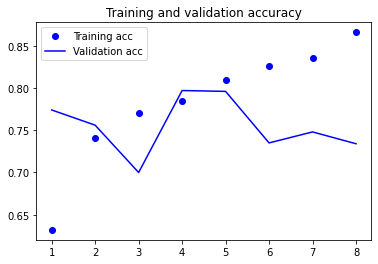

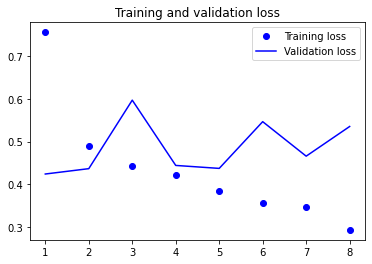

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Results Analysis: 

In [ ]:
# read the values in and store them in an array
test_images = [] # array for test images 

for i in range(1000,1249): 
  path='/content/gdrive/My Drive/Intelligence & Analytics/Colab Notebooks/_22/test/fake/'
  test_images.append(Image.open(path + 'cat.{}.jpg'.format(i))) # cat fake images 0 to 249
  test_images.append(Image.open(path + 'dog.{}.jpg'.format(i))) #dog fake images 250 to 499
for i in range(1250,1499):
  path='/content/gdrive/My Drive/Intelligence & Analytics/Colab Notebooks/_22/test/original/'
  test_images.append(Image.open(path + 'cat.{}.jpg'.format(i))) # cat original images 500 to 749
  test_images.append(Image.open(path + 'dog.{}.jpg'.format(i))) #dog original images 750 to 1000



In [ ]:
import numpy as np
model.evaluate(test_images, test_labels) #what are test_labels 1 = original and 0 = fake 
guesses=model.predict(test_images) #what the model has guessed
test_labels_guess=np.argmax(guesses, axis=1) #y values
errors=np.argwhere(test_labels != test_labels_guess) #incorrect ones, actual vs prediction
#argwhere --> x values 
print(np.transpose(errors))

f, axarr = plt.subplots(5, 5,figsize=(15,15))
plt.subplots_adjust(wspace=1,hspace=1)
for image_index in range(25):
  f.add_subplot(5, 5, image_index + 1)
  error_image_index = errors[image_index][0]
  axarr[image_index // 5, image_index % 5].imshow(test_images[error_image_index])
  axarr[image_index // 5, image_index % 5].axis('off')
  axarr[image_index // 5, image_index % 5].set_title("A:{},G:{}".format(test_labels[error_image_index], test_labels_guess[error_image_index]))

NameError: ignored

In [ ]:
reverse_index = dict([(val, key) for (key, val) in word_index.items()])
weights, biases = model.layers[0].get_weights()
print('Layer 0 Analysis')
print()
print('top fake images')
weights_sum = weights.sum(axis=1)
top_indices = weights_sum.argsort()[-20:]
for index in top_indices:
  print(reverse_index.get(index-3, '?'), ", ind: ", index, ", Sum of W: ", weights[index].sum())

print()
print('top original images')
top_indices = weights_sum.argsort()[:20]
for index in top_indices:
  print(reverse_index.get(index-3, '?'), ", ind: ", index, ", Sum of W: ", weights[index].sum())

from keras import backend as K

#We can see the output of all layers to get more insight about what contributes to a given output
print('All Layers Analysis')
inp = model.input                                           # input placeholder
outputs = [layer.output for layer in model.layers]          # all layer outputs
functors = [K.function([inp], [out]) for out in outputs]
test=np.zeros((1,10000))
test[0,4258]=1
outs = [func([test]) for func in functors]
print(outs) 

Layer 0 Analysis

top fake images


NameError: ignored

In [ ]:
datagen = ImageDataGenerator (
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2, 
    shear_range = 0.2, 
    zoom_range = 0.2, 
    horizontal_flip = True, 
    fill_mode = 'nearest'
)

In [ ]:
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for 
          fname in os.listdir(train_cats_dir)]
img_path = fnames[3] # chooses one image to augment 
img = image.load_img(img_path, target_size=(150,150))
x = image.img_to_array(img) # converts it to a numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape) #reshapes it to (1, 150, 150, 3)

i = 0
for batch in datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(image.array_to_img(batch[0]))
  i += 1
  if i % 4 == 0:
    break

plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', 
                        input_shape = (150, 150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer=optimizers.RMSprop() , metrics=['acc'])


In [ ]:
train_datagen = ImageDataGenerator (
    rescale = 1./255,
    rotation_range = 40, 
    width_shift_range = 0.2, 
    height_shift_range = 0.2,
    shear_range = 0.2, 
    zoom_range = 0.2, 
    horizontal_flip = True, )
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    validation_dir, 
    target_size = (150, 150), 
    batch_size = 32, 
    class_mode = 'binary')
history = model.fit_generator(
    train_generator, 
    steps_per_epoch = 100,
    epochs = 100, 
    validation_data = validation_generator,
    validation_steps = 50)

Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 198s 2s/step - loss: 0.8564 - acc: 0.5067 - val_loss: 0.6917 - val_acc: 0.5000
Epoch 2/100
100/100 [==============================] - 188s 2s/step - loss: 0.7024 - acc: 0.5035 - val_loss: 0.6727 - val_acc: 0.5200
Epoch 3/100
100/100 [==============================] - 188s 2s/step - loss: 0.6954 - acc: 0.5243 - val_loss: 0.6689 - val_acc: 0.5510
Epoch 4/100
100/100 [==============================] - 193s 2s/step - loss: 0.6945 - acc: 0.5348 - val_loss: 0.6670 - val_acc: 0.5400
Epoch 5/100
100/100 [==============================] - 189s 2s/step - loss: 0.6924 - acc: 0.5317 - val_loss: 0.6659 - val_acc: 0.5730
Epoch 6/100
100/100 [==============================] - 187s 2s/step - loss: 0.6933 - acc: 0.5345 - val_loss: 0.6952 - val_acc: 0.5660
Epoch 7/100
100/100 [==============================] - 191s 2s/step - loss: 0.6955 - acc: 0.5332 - val_loss: 0.7513 - val_acc: 0.5300
Epoch 8/100
100/100 